Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in model folder:
['class_indices.json', 'epoch_06.keras']
Model loaded successfully


Saving test1.jpeg to test1 (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


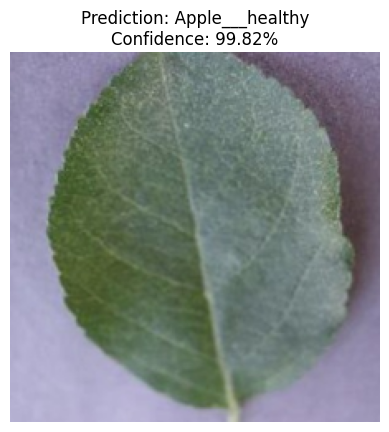

Predicted Class: Apple___healthy
Confidence: 99.82%


In [ ]:
# ==========================
# 1. MOUNT GOOGLE DRIVE
# ==========================
from google.colab import drive
drive.mount('/content/drive')

# ==========================
# 2. IMPORT LIBRARIES
# ==========================
import tensorflow as tf
import numpy as np
import json
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# ==========================
# 3. PATH SETTINGS
# ==========================
MODEL_PATH = "/content/drive/MyDrive/Chatbot/plantDiseaseModel/epoch_06.keras"
CLASS_INDEX_PATH = "/content/drive/MyDrive/Chatbot/plantDiseaseModel/class_indices.json"
IMAGE_SIZE = 224

# ==========================
# 4. VERIFY FILES EXIST
# ==========================
print("Files in model folder:")
print(os.listdir("/content/drive/MyDrive/Chatbot/plantDiseaseModel"))

# ==========================
# 5. LOAD MODEL
# ==========================
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully")

# ==========================
# 6. LOAD CLASS INDICES
# ==========================
with open(CLASS_INDEX_PATH, "r") as f:
    class_indices = json.load(f)

index_to_class = {v: k for k, v in class_indices.items()}

# ==========================
# 7. UPLOAD TEST IMAGE
# ==========================
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# ==========================
# 8. PREPROCESS IMAGE
# ==========================
img = Image.open(image_path).convert("RGB")
img = img.resize((IMAGE_SIZE, IMAGE_SIZE))

img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ==========================
# 9. PREDICT
# ==========================
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions[0])
predicted_class = index_to_class[predicted_index]
confidence = float(np.max(predictions[0])) * 100

# ==========================
# 10. DISPLAY RESULT
# ==========================
if confidence<60:
  print("Not a plant image!")
else:
  plt.imshow(img)
  plt.axis("off")
  plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}%")
  plt.show()

  print("Predicted Class:", predicted_class)
print("Confidence:", f"{confidence:.2f}%")
